In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv("/content/ads (1).csv")

In [ ]:
df


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


# Data Preprocessing

In [ ]:
df.iloc[:,1:]

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [ ]:
df.duplicated().sum()

0

# EDA

<Axes: >

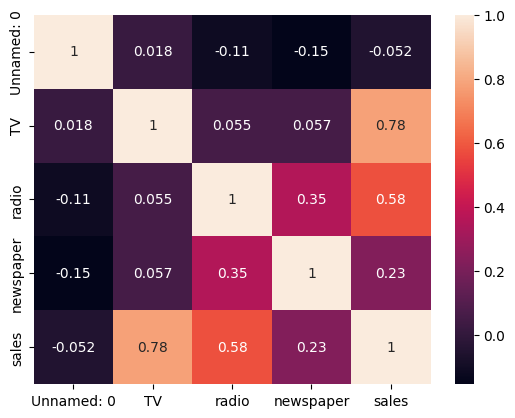

In [ ]:

sns.heatmap(df.corr(numeric_only = True), annot= True)

we can see that the sales is highly correlated with TV.

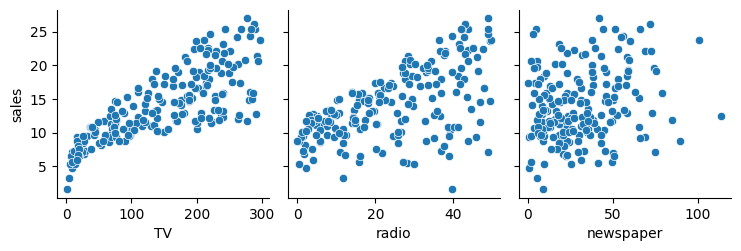

In [ ]:
sns.pairplot(df,x_vars=['TV','radio','newspaper'], y_vars=['sales'],kind ='scatter')

As the advertising cost increases in TV ads the sales will also increase .While for the radio and newspaper it is bit unpredictable.

Simple Linear regression

In [ ]:
X = df[['TV']]
y= df.sales

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size =0.3,random_state= 20)

In [ ]:
X_train

,TV
134,36.9
62,239.3
20,218.4
21,237.4
45,175.1
...,...
148,38.0
137,273.7
156,93.9
15,195.4


In [ ]:
y_train

134    10.8
62     15.7
20     18.0
21     12.5
45     14.9
       ... 
148    10.9
137    20.8
156    15.3
15     22.4
99     17.2
Name: sales, Length: 140, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([19.94396707, 18.50683071, 11.69056954, 19.76376188, 18.80416927,
       17.0021174 , 14.9657988 , 11.54190026, 18.10587417,  9.01902765,
        8.45138132, 12.72674936, 15.9073709 ,  8.10448633, 16.91651994,
       19.77277214,  7.48277844, 16.61467625,  8.1450325 ,  8.07295043,
       18.48881019, 16.74081988, 12.24470049, 18.25454345, 16.53358392,
       12.01043374, 17.75447406,  7.64946824,  7.69001441, 15.62805286,
       11.60947721, 15.62805286,  8.42885567,  8.50544287, 20.25482101,
       16.00197862,  9.31186108, 11.33916943, 10.73548205, 15.21358093,
       16.20020432, 13.57371374, 17.20034311, 16.79037631, 11.92483628,
       18.73208719, 17.31747648, 17.38955855, 18.1869665 ,  7.32960403,
        8.37028898,  9.9831254 , 11.8212183 , 15.01535522, 11.27609761,
        9.30285082, 16.25877101, 10.73998718,  7.82516829, 13.2042931 ])

In [ ]:
y_test

150    16.1
28     18.9
13      9.7
178    11.8
109    19.8
168    17.1
177    11.7
196     9.7
47     23.2
195     7.6
136     9.5
77     14.2
187    17.3
166     8.0
84     21.7
175    27.0
155     3.2
167    12.2
121     7.0
192     5.9
176    20.2
113    15.9
89     16.7
147    25.4
185    22.6
143    10.4
199    13.4
126     6.6
5       7.2
97     15.5
34      9.5
139    20.7
44      8.5
72      8.8
183    26.2
85     15.2
149    10.1
46     10.6
86     12.0
112    14.1
152    16.6
67     13.4
133    19.6
59     18.4
63     14.0
184    17.6
174    11.5
122    11.6
111    21.8
130     1.6
12      9.2
129     9.7
51     10.7
153    19.0
88     12.9
1      10.4
55     23.7
80     11.8
158     7.3
64     18.0
Name: sales, dtype: float64

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
print("MSE= ", mean_squared_error(y_true=y_test, y_pred=y_pred))
print("MAE= ", mean_absolute_error(y_true=y_test, y_pred=y_pred))
print("r2_score= ", r2_score(y_true=y_test, y_pred=y_pred))

MSE=  11.382339827055013
MAE=  2.5417343542668087
r2_score=  0.6579277580425043


In [ ]:
import pickle
with open("model.pickle", 'wb') as file:
  pickle.dump(model, file)


Multiple Linear regreesion

In [ ]:
X = df.iloc[:,:-1]
y = df.sales

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size =0.3,random_state= 20)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
print("MSE= ", mean_squared_error(y_true=y_test, y_pred=y_pred))
print("MAE= ", mean_absolute_error(y_true=y_test, y_pred=y_pred))
print("r2_score= ", r2_score(y_true=y_test, y_pred=y_pred))

MSE=  4.763125884695184
MAE=  1.5030135035019554
r2_score=  0.8568542870042719


In [ ]:
X = df.iloc[:,:-1]
y = df.sales

In [ ]:
from sklearn.linear_model import Lasso

model= Lasso()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MSE= ", mean_squared_error(y_true=y_test, y_pred=y_pred))
print("MAE= ", mean_absolute_error(y_true=y_test, y_pred=y_pred))
print("r2_score= ", r2_score(y_true=y_test, y_pred=y_pred))


MSE=  4.746011830898351
MAE=  1.5151272223931258
r2_score=  0.8573686138333962


In [ ]:
from sklearn.linear_model import Ridge

model= Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MSE= ", mean_squared_error(y_true=y_test, y_pred=y_pred))
print("MAE= ", mean_absolute_error(y_true=y_test, y_pred=y_pred))
print("r2_score= ", r2_score(y_true=y_test, y_pred=y_pred))

MSE=  4.763068104745739
MAE=  1.5030261098160602
r2_score=  0.8568560234589155
